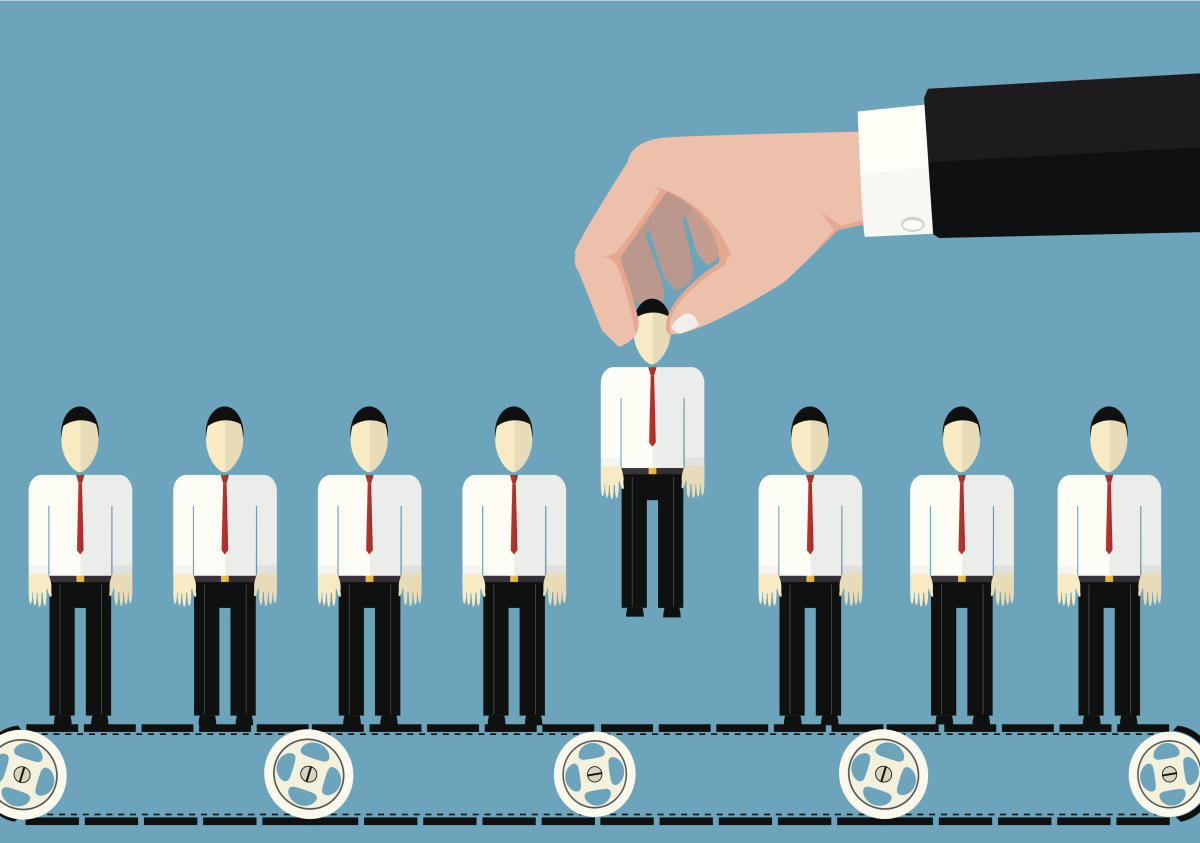

In [37]:
#Import library
from IPython.display import Image
# Load image from local storage
Image(filename = "abc.jpg", width = 800, height = 500)

## About the Dataset
I found this dataset here on Kaggle.
A quick glance at the dataset description on Kaggle tells us that it has the following columns:

1. sl_no : Serial Number

2. gender : Gender- Male='M',Female='F'

3. ssc_p : Secondary Education percentage- 10th Grade

4. ssc_b : Board of Education- Central/ Others

5. hsc_p : Higher Secondary Education percentage- 12th Grade

6. hsc_b : Board of Education- Central/ Others

7. hsc_s : Specialization in Higher Secondary Education

8. degree_p : Degree Percentage

9. degree_t : Under Graduation(Degree type)- Field of degree education

10. workex : Work Experience

11. etest_p : Employability test percentage ( conducted by college)

12. specialisation : Post Graduation(MBA)- Specialization

13. mba_p : MBA percentage

14. status : Status of placement- Placed/Not placed

15. salary : Salary offered by corporate to candidates

Let us quickly view the first few rows and extract some prelimindary information about the dataset.

# Importing libraries and exploring Data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

In [4]:
data=pd.read_csv('datasets_596958_1073629_Placement_Data_Full_Class.csv')

In [5]:
data.shape

(215, 15)

In [6]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [7]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


#### We have 7 columns with real values and 8 with object datatype

#### It is clear that only salary has null columns. Let's see how much?

# Checking for missing data 

In [9]:
data.isnull().values.any()

True

In [10]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [11]:
import missingno as msno

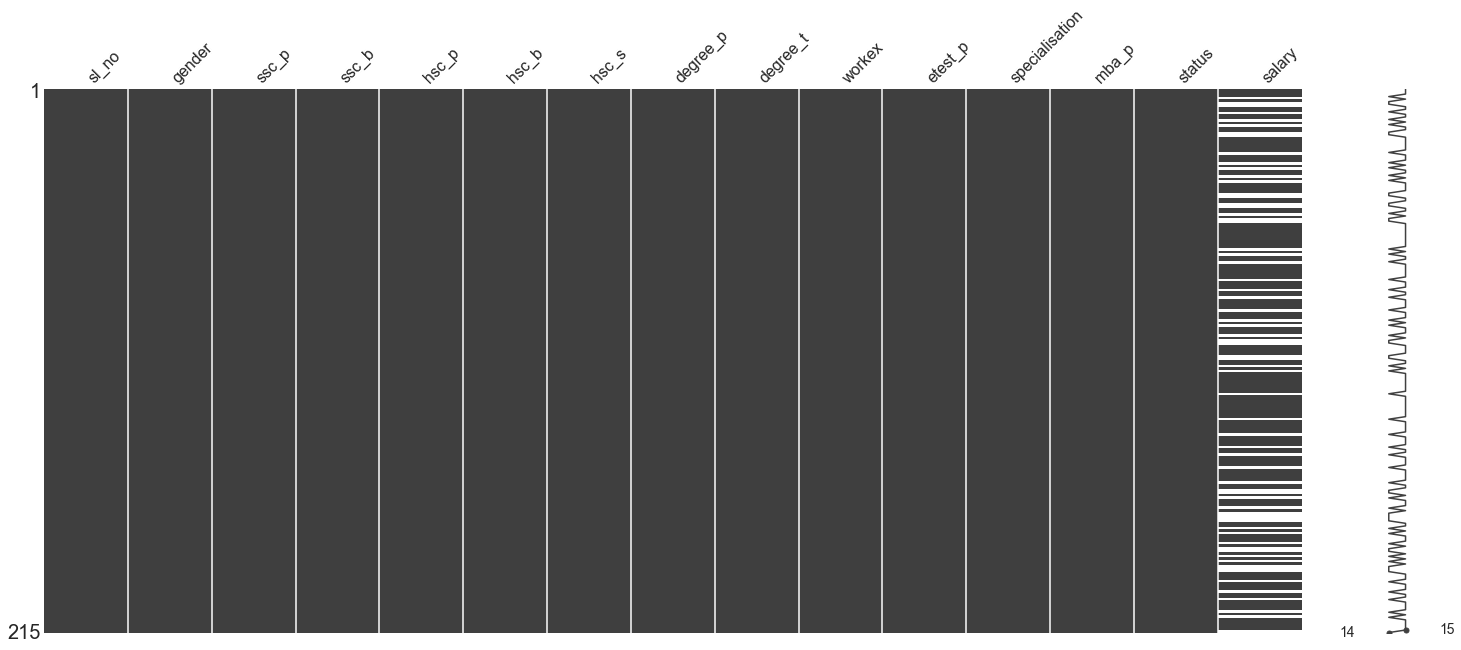

In [12]:
msno.matrix(data)



In [13]:
missing_percantage=data['salary'].isnull().sum()/len(data)*100

print(round(missing_percantage,2),'%')

31.16 %


#### This means that around 31% candidates were not placed which is sad but let's see what were the reasons :)

#  Getting the object columns

In [14]:
column=data.select_dtypes(include=['object'])
for col in column:
    print(col)
    display(data[col].value_counts())

gender


M    139
F     76
Name: gender, dtype: int64

ssc_b


Central    116
Others      99
Name: ssc_b, dtype: int64

hsc_b


Others     131
Central     84
Name: hsc_b, dtype: int64

hsc_s


Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

degree_t


Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

workex


No     141
Yes     74
Name: workex, dtype: int64

specialisation


Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64

status


Placed        148
Not Placed     67
Name: status, dtype: int64

### OBSERVATION:
Looks like except for hsc_s and degree_t with 3 classes, all other have 2 classes each and also we can see that this data is slightly imbalanced as we have 148 placed students and 67 not placed students.

# Exploring & Visualizations Data by each Features

## Feature: Gender

* ### Does gender affect placements?

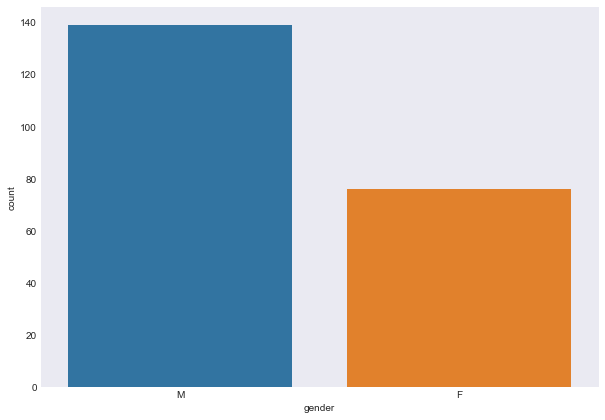

In [15]:
plt.figure(figsize=(10,7))
sns.countplot(x='gender',data=data)

plt.show()

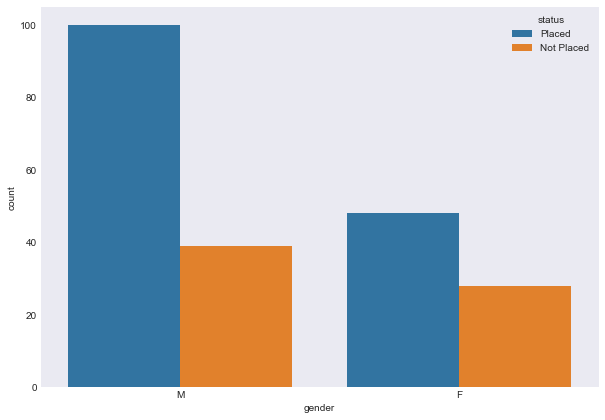

In [16]:
plt.figure(figsize=(10,7))
sns.countplot(x='gender',hue='status',data=data)
plt.show()

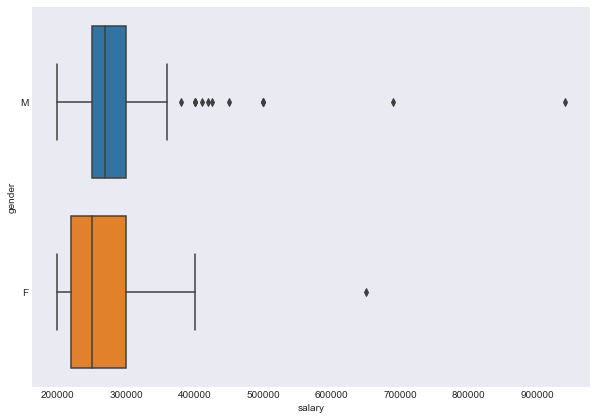

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(y='gender',x='salary',data=data)

### OBSERVATIONS:
* We have samples of 139 Male studets and 76 Female students.
* The number of male students are almost double as compared to female.
* More outliers on Male,Male students are getting high CTC jobs.
* Male students are offered slightly greater salary than female on an average.


In [18]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Feature : ssc_b,hsc_b,hsc_s

* ### Does the board of education affect placements?

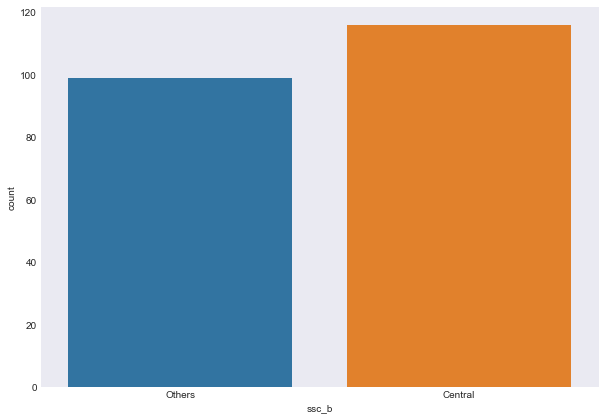

In [19]:
plt.figure(figsize=(10,7))
sns.countplot(x='ssc_b',data=data)
plt.show()


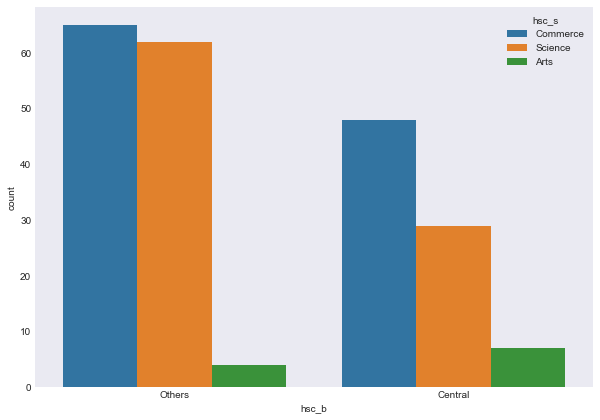

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(x='hsc_b',hue='hsc_s',data=data)
plt.show()

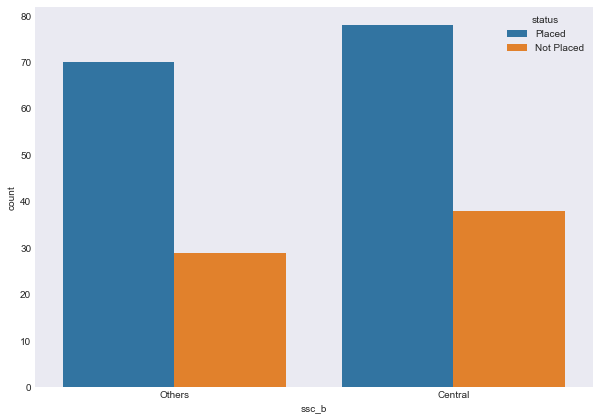

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(x='ssc_b',hue='status',data=data)
plt.show()


<Figure size 1080x576 with 0 Axes>

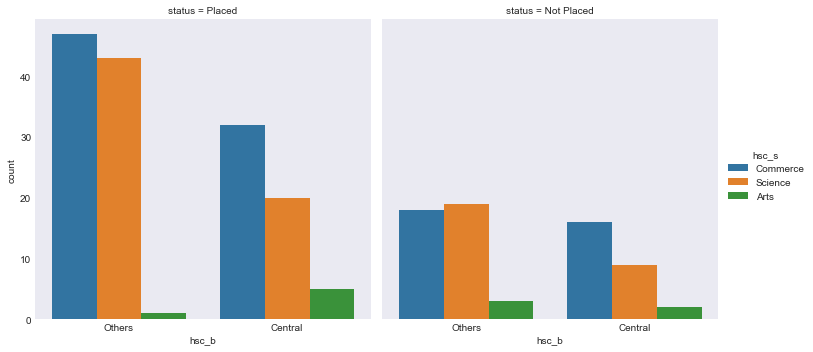

In [22]:
plt.figure(figsize=(15,8))
sns.catplot(x='hsc_b',hue='hsc_s',col='status',data=data,kind='count')
plt.show()

## Observetion:
* There is count of central board students is very high as compared to all other boards in ssc_b but its reverse in hsc_b.
* Look like not much difference between in the fraction of placed candidates in respective boards. 
* Board doesn't matter in placements.


# Feature : degree_t,specialisation

* ### Which degree and MBA specialization has the highest Salary?

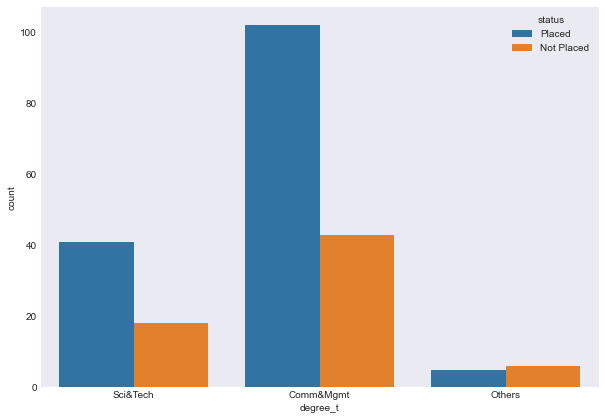

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(x="degree_t", hue='status',data=data)

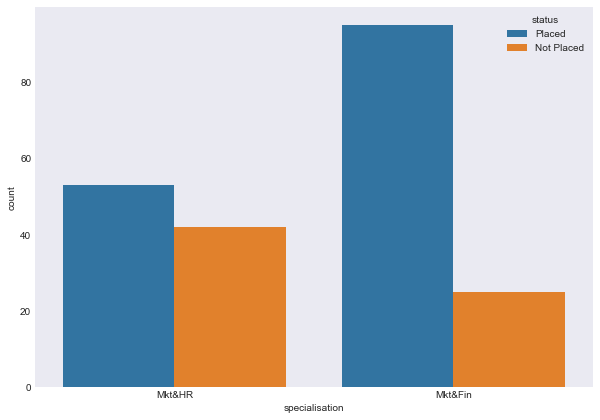

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(x="specialisation", hue='status',data=data)

Text(0.5, 1.0, 'MBA ')

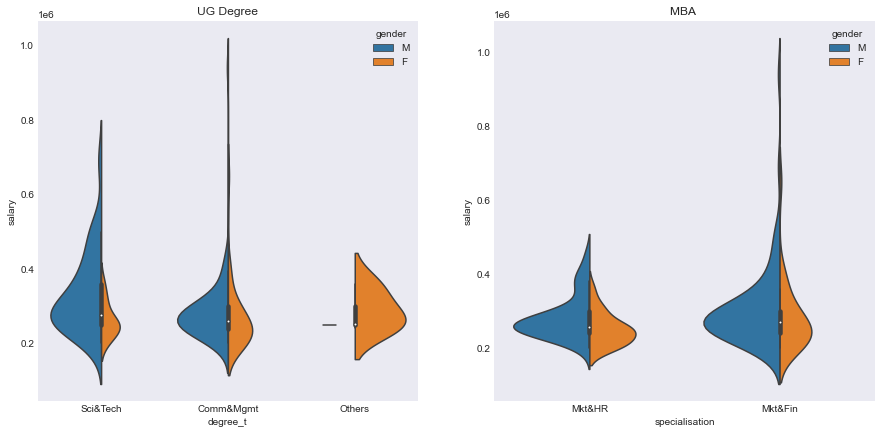

In [25]:
plt.figure(figsize = (15,7))
ax=plt.subplot(121)
sns.violinplot(x='degree_t',y='salary',hue='gender',data=data,split=True,scale="count")
ax.set_title('UG Degree')
ax=plt.subplot(122)
sns.violinplot(x='specialisation',y='salary',hue='gender',data=data,split=True,scale="count")
ax.set_title('MBA ')

# Observation :
*  Looks like Commerce and Science degree students are preffered by companies which is obvious. Students who opted for Others have very low placement chance.
* Specialisation is a clear indicator in placements. Compared to MktandFin, Mkt&HR students have low placements. This might be because there is low requirements for HR in a company.
* More Highly Paid Jobs for Mkt&Fin students.
* Commerce&Mgmt students occasionally get dream placements with high salary



# Feature : ssc_p,hsc_p,degree_p,mba_p

* ### Does your academic score influence your chance of placement?

Text(0.5, 1.0, 'MBA percentage')

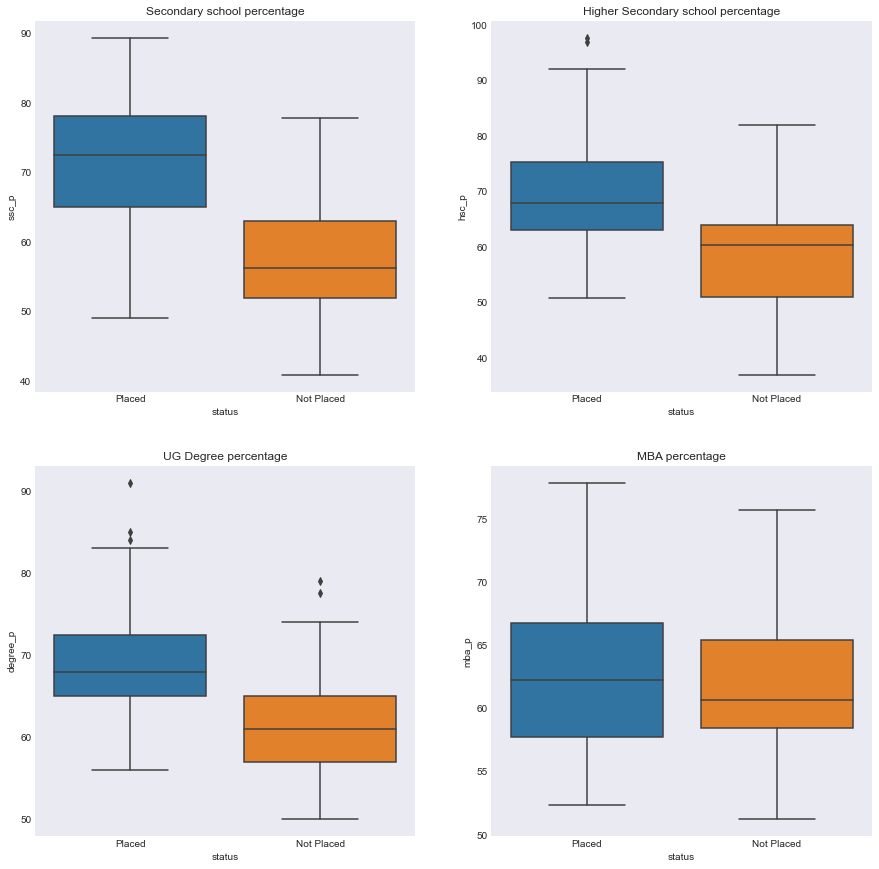

In [26]:
plt.figure(figsize = (15, 15))
ax=plt.subplot(221)
sns.boxplot(x='status',y='ssc_p',data=data)
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
sns.boxplot(x='status',y='hsc_p',data=data)
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
sns.boxplot(x='status',y='degree_p',data=data)
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
sns.boxplot(x='status',y='mba_p',data=data)
ax.set_title('MBA percentage')

### OBSERVATION :
* Most of the candidates educational performances are between 60-80%
* We can see that getting good percentages in MBA does not guarantee placement of the candidate.
* Comparitively there's a slight difference between the percentage scores between both the groups, But still placed candidates still has an upper hand. So as per the plot,percentage do not influence the placement status
* #### These percentages don't have any influence over their salary.



# Feature : workex

* ### Does Work Experience increases results in higher CTC jobs?

Text(0.5, 1.0, 'Gender vs Salary based on work experience')

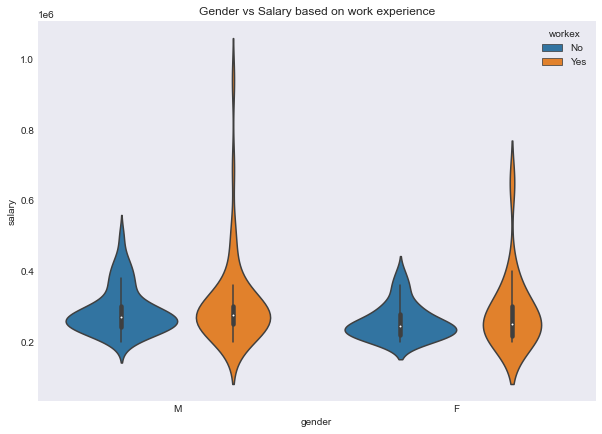

In [27]:
plt.figure(figsize=(10,7))
sns.violinplot(x=data["gender"], y=data["salary"], hue=data["workex"])
plt.title("Gender vs Salary based on work experience")

### OBSERVATION :
* Work Experience is a clear indicator as more work experience results in higher CTC jobs.

# Feature : salary

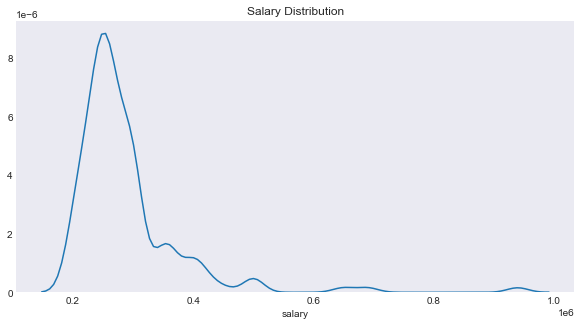

In [28]:
plt.figure(figsize=(10,5))
sns.distplot(data['salary'], bins=50, hist=False)
plt.title("Salary Distribution")
plt.show()

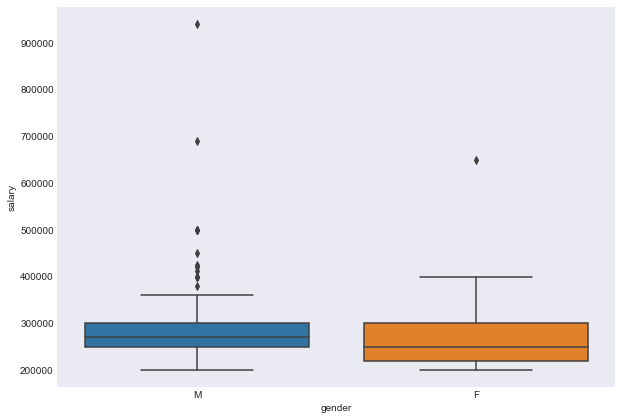

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x='gender',y='salary',data=data)
plt.show()

### OBSERVATION :
* Looking at the distribution we can say that the most of the students get a package between 200k-400k and most salaries above 400,000 are outliers.
* Male candidates are making more money as compared to female candidates.

## Correlation matrix

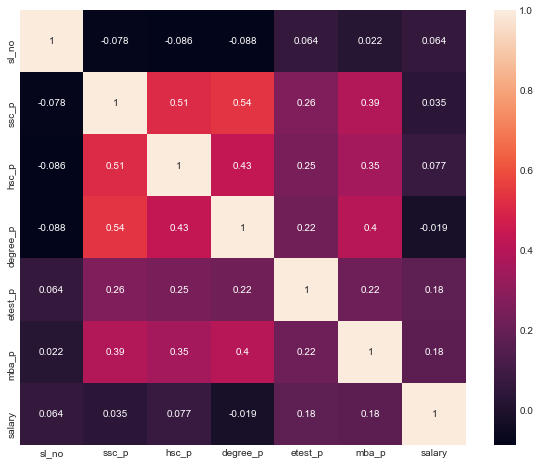

In [32]:
cor=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cor,annot=True)

## Thanks you